In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('hospital_readmission_data.csv')
#data = data.sample(frac=1)
#data = data.sample(frac=1)
#data = data.sample(frac=1)
#data = data.sample(frac=1)
label = data['readmitted']
print data.keys()
#del data['readmitted']
#del data['race']
#del data['gender']
#del data['A1Cresult']
#del data['number_outpatient']
#del data['number_emergency']
#del data['change']
#del data['diabetesMed']
#del data['number_inpatient']
#del data['admission_source_id']
#print data.keys()
#print label.head()
data.head()

Index([u'race', u'gender', u'age', u'admission_type_id',
       u'discharge_disposition_id', u'admission_source_id',
       u'time_in_hospital', u'medical_specialty', u'num_lab_procedures',
       u'num_procedures', u'num_medications', u'number_outpatient',
       u'number_emergency', u'number_inpatient', u'diag_1', u'diag_2',
       u'number_diagnoses', u'A1Cresult', u'insulin', u'change',
       u'diabetesMed', u'readmitted'],
      dtype='object')


,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,number_emergency,number_inpatient,diag_1,diag_2,number_diagnoses,A1Cresult,insulin,change,diabetesMed,readmitted
0,0,1,5,1,1,1,1,0,25,0,...,0,0,3,1,9,0,3,1,1,1
1,0,1,0,1,1,7,7,2,80,0,...,0,0,3,8,9,2,3,1,1,0
2,0,1,4,1,7,7,1,0,8,0,...,0,0,6,8,6,0,0,0,0,0
3,0,0,2,1,1,7,2,0,26,3,...,0,0,1,8,4,0,0,0,0,1
4,2,0,0,3,18,1,7,6,31,6,...,0,0,5,6,6,1,1,1,1,1


In [3]:
#data.to_csv('hospital_r/eadmission_data.csv',index=False)
kd = data
Xnew = kd.as_matrix()
Xnew.shape

/home/shivam/Desktop/ml/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


(117303, 22)

In [4]:
del data['readmitted']

In [5]:
X = data.as_matrix()
y = label.as_matrix()
print X.shape
print y.shape
'''from sklearn.feature_selection import SelectKBest
selkbest = SelectKBest(k=12)
selkbest.fit(X,y)
X = selkbest.transform(X)'''
'''from sklearn.model_selection import KFold
kf = KFold(n_splits=2,shuffle=True)
kf.get_n_splits(X)

print(kf)  

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]'''
'''from sklearn.decomposition import PCA
pca = PCA(n_components=15)
pca.fit(X)
X = pca.transform(X)'''
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(  X, y, test_size=0.20024, random_state=42)
print X_train.shape, X_test.shape, y_train.shape, y_test.shape
print np.unique(y_test,return_counts=True)

from sklearn.preprocessing import normalize
X_train = normalize(X_train,norm='l2')
X_test = normalize(X_test,norm='l2')

/home/shivam/Desktop/ml/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/home/shivam/Desktop/ml/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


(117303, 21)
(117303,)
(93814, 21) (23489, 21) (93814,) (23489,)
(array([0, 1]), array([ 8317, 15172]))


In [6]:
X_train = (X_train-np.mean(X_train))/np.std(X_train)
print X_train.shape
X_train

(93814, 21)


array([[-0.49990586, -0.49990586, -0.03748486, ..., -0.49990586,
        -0.49990586, -0.49990586],
       [-0.49990586, -0.49990586, -0.23947478, ..., -0.36969032,
        -0.36969032, -0.36969032],
       [ 0.14429016, -0.49990586, -0.17780785, ..., -0.49990586,
        -0.49990586, -0.17780785],
       ...,
       [-0.49990586, -0.49990586, -0.49990586, ..., -0.41848128,
        -0.41848128, -0.41848128],
       [-0.49990586, -0.43372043, -0.43372043, ..., -0.49990586,
        -0.49990586, -0.43372043],
       [-0.49990586, -0.49990586,  0.43450043, ..., -0.49990586,
        -0.26630429, -0.26630429]])

In [7]:
X_test = (X_test-np.mean(X_test))/np.std(X_test)
print X_test.shape
X_test

(23489, 21)


array([[-0.49998495, -0.29902692, -0.09806889, ..., -0.49998495,
        -0.49998495, -0.49998495],
       [-0.49998495, -0.49998495, -0.02130989, ..., -0.38031619,
        -0.49998495, -0.38031619],
       [-0.3500394 , -0.42501217, -0.3500394 , ..., -0.27506662,
        -0.42501217, -0.42501217],
       ...,
       [-0.33316475, -0.41657485, -0.08293446, ..., -0.24975465,
        -0.41657485, -0.41657485],
       [-0.49998495, -0.49998495, -0.08160167, ..., -0.41630829,
        -0.49998495, -0.41630829],
       [-0.49998495, -0.41448727, -0.07249654, ..., -0.49998495,
        -0.49998495, -0.49998495]])

In [8]:
from sklearn.metrics import accuracy_score
import time
clf = LogisticRegression(tol=0.00001,C=3.0,max_iter=100,solver='sag')
old_ticks = time.time()
clf.fit(X_train,y_train)
new_ticks = time.time()
print new_ticks - old_ticks
old_ticks = time.time()
pred = clf.predict(X_test)
new_ticks = time.time()
print new_ticks - old_ticks
accuracy_score(pred,y_test)

5.32981801033
0.0245048999786


0.6526884924858445

In [9]:
clf.coef_

array([[-6.26814047e-01, -7.53988078e-01,  3.24067030e-01,
        -1.58771303e-01,  1.55468207e-01,  2.59597519e-03,
         4.05869036e-01,  4.01379714e-02,  1.50423958e-01,
        -4.31003228e-01,  3.63467807e-02,  7.55405146e-01,
         2.38422359e+00,  4.77863543e+00, -2.83965556e-01,
        -1.24787245e-01,  1.73465210e-01, -6.07630321e-01,
         5.57503056e-01, -1.28850624e-01,  5.72550576e-01]])

In [10]:
clf1 = tree.DecisionTreeClassifier(min_samples_split=15)
old_ticks = time.time()
clf1.fit(X_train,y_train)
new_ticks = time.time()
print new_ticks - old_ticks
old_ticks = time.time()
pred1 = clf1.predict(X_test)
new_ticks = time.time()
print new_ticks - old_ticks
print accuracy_score(pred1,y_test)
y_score = clf1.predict_proba(X_test)
y_score

4.94538807869
0.0124568939209
0.7363446719741156


array([[0.        , 1.        ],
       [0.5       , 0.5       ],
       [0.        , 1.        ],
       ...,
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.83333333, 0.16666667]])

In [56]:
clf1.coef_

AttributeError: 'DecisionTreeClassifier' object has no attribute 'coef_'

In [11]:
y_t = []
for k in y_train:
    ys = [0,0]
    ys[k] = 1
    y_t.append(ys)

y_te = []
for k in y_test:
    ys = [0,0]
    ys[k] = 1
    y_te.append(ys)
y_t = np.array(y_t)
y_te = np.array(y_te)
print y_t.shape
print y_te.shape

(93814, 2)
(23489, 2)


In [12]:
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_te[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_te.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
roc_auc

{0: 0.7485180986370513, 1: 0.7485180986370512, 'micro': 0.7954440558227788}

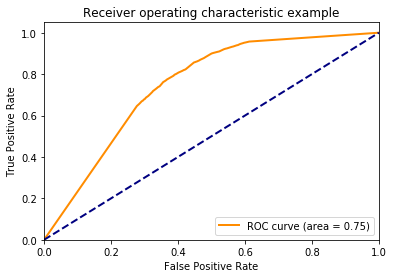

In [13]:
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

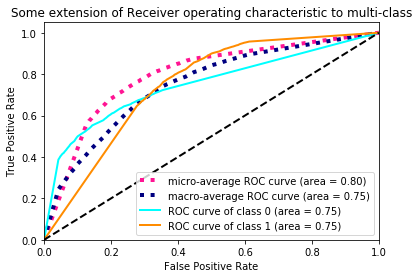

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

n_classes = 2
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [15]:
from sklearn.neural_network import MLPClassifier
clf2 = MLPClassifier(hidden_layer_sizes=(15,10),solver='lbfgs',activation='relu')
old_ticks = time.time()
clf2.fit(X_train,y_train)
new_ticks = time.time()
print new_ticks - old_ticks
old_ticks = time.time()
pred2 = clf2.predict(X_test)
new_ticks = time.time()
print new_ticks - old_ticks
print accuracy_score(pred2,y_test)
y_score = clf2.predict_proba(X_test)
print y_score
y_score.shape

31.8514678478
0.015575170517
0.6622674443356464
[[0.51034622 0.48965378]
 [0.18590685 0.81409315]
 [0.18579723 0.81420277]
 ...
 [0.25966072 0.74033928]
 [0.21122225 0.78877775]
 [0.47729324 0.52270676]]


(23489, 2)

In [16]:
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_te[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_te.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
roc_auc

{0: 0.6335342237830703, 1: 0.6335342237830703, 'micro': 0.7104895375675662}

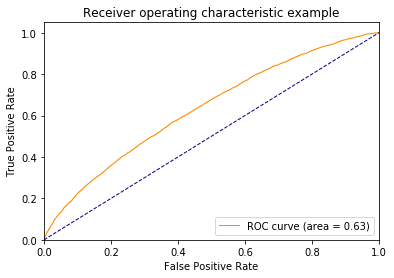

In [17]:
plt.figure()
lw = 1
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

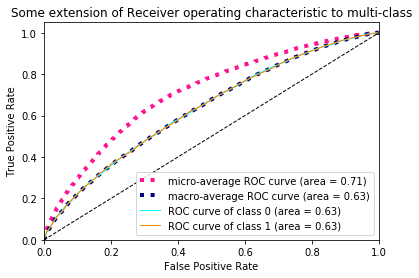

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

n_classes = 2
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [19]:
clf2 = RandomForestClassifier(min_samples_leaf=1,n_estimators=8)
old_ticks = time.time()
clf2.fit(X_train,y_train)
new_ticks = time.time()
print new_ticks - old_ticks
old_ticks = time.time()
pred2 = clf2.predict(X_test)
new_ticks = time.time()
print new_ticks - old_ticks
accuracy_score(pred2,y_test)

5.68637394905
0.0871639251709


0.821065179445698

In [20]:
from sklearn.metrics import roc_auc_score
roc_auc_score(pred2
              ,y_test)

0.8160923340198046

In [21]:
'''from sklearn.ensemble import GradientBoostingRegressor
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)

pred = clf.predict(X_test)
print len(pred)
from sklearn.metrics import mean_squared_error 
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)'''

'from sklearn.ensemble import GradientBoostingRegressor\nparams = {\'n_estimators\': 500, \'max_depth\': 4, \'min_samples_split\': 2,\n          \'learning_rate\': 0.01, \'loss\': \'ls\'}\nclf = GradientBoostingRegressor(**params)\n\nclf.fit(X_train, y_train)\n\npred = clf.predict(X_test)\nprint len(pred)\nfrom sklearn.metrics import mean_squared_error \nmse = mean_squared_error(y_test, clf.predict(X_test))\nprint("MSE: %.4f" % mse)'

In [22]:
'''print pred[:5]
print pred.shape
ans = pred>0.5
ans = ans.astype(int)
ans
from sklearn.metrics import accuracy_score
accuracy_score(ans,y_test)'''

'print pred[:5]\nprint pred.shape\nans = pred>0.5\nans = ans.astype(int)\nans\nfrom sklearn.metrics import accuracy_score\naccuracy_score(ans,y_test)'

In [23]:
'''import matplotlib.pyplot as plt
plt.scatter(y_test,pred)
plt.show()'''

'import matplotlib.pyplot as plt\nplt.scatter(y_test,pred)\nplt.show()'

In [24]:
'''from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, ans)'''

'from sklearn.metrics import roc_auc_score\nroc_auc_score(y_test, ans)'

In [25]:
y_t = []
for k in y_train:
    ys = [0,0]
    ys[k] = 1
    y_t.append(ys)

y_te = []
for k in y_test:
    ys = [0,0]
    ys[k] = 1
    y_te.append(ys)
y_t = np.array(y_t)
y_te = np.array(y_te)
print y_t.shape
print y_te.shape

(93814, 2)
(23489, 2)


In [71]:
import tensorflow as tf
#from tensorflow.examples.tutorials.mnist import input_data
#mnist = input_data.read_data_sets("/tmp/data/", one_hot = True)
hidden_layer_1 = None
hidden_layer_2 = None
final_layer = None
n_nodes_hl1 = 10
n_nodes_hl2 = 5
'''n_nodes_hl3 = 10
n_nodes_hl4 = 10
n_nodes_hl5 = 10
n_nodes_hl6 = 10
n_nodes_hl7 = 10
n_nodes_hl8 = 10
n_nodes_hl9 = 10
n_nodes_hl10 = 10
n_nodes_hl11 = 10
n_nodes_hl12 = 10'''

n_classes = 2
batch_size = 99

x = tf.placeholder('float', [None, X_test.shape[1]])
y = tf.placeholder('float')

def neural_network_model(data):
    hidden_1_layer = {'weights':tf.Variable(tf.random_normal([X_test.shape[1], n_nodes_hl1])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl1]))}
    hidden_2_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl1, n_nodes_hl2])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl2]))}
    '''hidden_3_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl2, n_nodes_hl3])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl3]))}
    hidden_4_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl3, n_nodes_hl4])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl4]))}
    hidden_5_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl4, n_nodes_hl5])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl5]))}
    hidden_6_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl5, n_nodes_hl6])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl6]))}
    hidden_7_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl6, n_nodes_hl7])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl7]))}
    hidden_8_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl7, n_nodes_hl8])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl8]))}
    hidden_9_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl8, n_nodes_hl9])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl9]))}
    hidden_10_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl9, n_nodes_hl10])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl10]))}
    hidden_11_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl10, n_nodes_hl11])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl11]))}
    hidden_12_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl11, n_nodes_hl12])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl12]))}'''
    output_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl2, n_classes])),
                    'biases':tf.Variable(tf.random_normal([n_classes])),}


    l1 = tf.add(tf.matmul(data,hidden_1_layer['weights']), hidden_1_layer['biases'])
    l1 = tf.nn.relu(l1)
    l2 = tf.add(tf.matmul(l1,hidden_2_layer['weights']), hidden_2_layer['biases'])
    l2 = tf.nn.relu(l2)
    '''l3 = tf.add(tf.matmul(l2,hidden_3_layer['weights']), hidden_3_layer['biases'])
    l3 = tf.nn.relu(l3)
    l4 = tf.add(tf.matmul(l3,hidden_4_layer['weights']), hidden_4_layer['biases'])
    l4 = tf.nn.relu(l4)
    l5 = tf.add(tf.matmul(l4,hidden_5_layer['weights']), hidden_5_layer['biases'])
    l5 = tf.nn.relu(l5)
    l6 = tf.add(tf.matmul(l5,hidden_6_layer['weights']), hidden_6_layer['biases'])
    l6 = tf.nn.relu(l6)
    l7 = tf.add(tf.matmul(l6,hidden_7_layer['weights']), hidden_7_layer['biases'])
    l7 = tf.nn.relu(l7)
    l8 = tf.add(tf.matmul(l7,hidden_8_layer['weights']), hidden_8_layer['biases'])
    l8 = tf.nn.relu(l8)
    l9 = tf.add(tf.matmul(l8,hidden_9_layer['weights']), hidden_9_layer['biases'])
    l9 = tf.nn.relu(l9)
    l10 = tf.add(tf.matmul(l9,hidden_10_layer['weights']), hidden_10_layer['biases'])
    l10 = tf.nn.relu(l10)
    l11 = tf.add(tf.matmul(l10,hidden_11_layer['weights']), hidden_11_layer['biases'])
    l11 = tf.nn.relu(l11)
    l12 = tf.add(tf.matmul(l11,hidden_12_layer['weights']), hidden_12_layer['biases'])
    l12 = tf.nn.relu(l12)'''
    output = tf.matmul(l2,output_layer['weights']) + output_layer['biases']
    print tf
    return output

def train_neural_network(x):
    prediction = neural_network_model(x)
    # OLD VERSION:
    #cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(prediction,y) )
    # NEW:
    cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=y) )
    optimizer = tf.train.AdamOptimizer(learning_rate=0.03,beta1=0.9,beta2=0.999,epsilon=1e-09,use_locking=True,name='Adam').minimize(cost)
    
    hm_epochs = 201
    with tf.Session() as sess:
        # OLD:
        #sess.run(tf.initialize_all_variables())
        # NEW:
        sess.run(tf.global_variables_initializer())

        for epoch in range(hm_epochs):
            epoch_loss = 0
            i = 0
            while i < len(X_train):
                start = i
                end = i+batch_size
                batch_x = np.array(X_train[start:end])
                batch_y = np.array(y_t[start:end])
                _, c = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})
                epoch_loss += c
                i+=batch_size
            if epoch%100==0:
                print('Epoch', epoch, 'completed out of',hm_epochs,'loss:',epoch_loss)

        correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))

        accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
        print('Accuracy:',accuracy.eval({x:X_test, y:y_te}))

train_neural_network(x)

<module 'tensorflow' from '/home/shivam/Desktop/ml/local/lib/python2.7/site-packages/tensorflow/__init__.pyc'>
('Epoch', 0, 'completed out of', 201, 'loss:', 795.6483302116394)
('Epoch', 100, 'completed out of', 201, 'loss:', 593.7936728596687)
('Epoch', 200, 'completed out of', 201, 'loss:', 592.878239274025)
('Accuracy:', 0.6459194)


In [34]:
import tensorflow as tf
#from tensorflow.examples.tutorials.mnist import input_data
#mnist = input_data.read_data_sets("/tmp/data/", one_hot = True)

n_nodes_hl1 = 10
n_nodes_hl2 = 5
'''n_nodes_hl3 = 10
n_nodes_hl4 = 10
n_nodes_hl5 = 10
n_nodes_hl6 = 10
n_nodes_hl7 = 10
n_nodes_hl8 = 10
n_nodes_hl9 = 10
n_nodes_hl10 = 10
n_nodes_hl11 = 10
n_nodes_hl12 = 10'''

n_classes = 2
batch_size = 99

x = tf.placeholder('float', [None, X_test.shape[1]])
y = tf.placeholder('float')

def neural_network_model(data):
    hidden_1_layer = {'weights':tf.Variable(tf.random_normal([X_test.shape[1], n_nodes_hl1])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl1]))}
    hidden_2_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl1, n_nodes_hl2])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl2]))}
    '''hidden_3_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl2, n_nodes_hl3])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl3]))}
    hidden_4_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl3, n_nodes_hl4])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl4]))}
    hidden_5_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl4, n_nodes_hl5])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl5]))}
    hidden_6_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl5, n_nodes_hl6])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl6]))}
    hidden_7_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl6, n_nodes_hl7])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl7]))}
    hidden_8_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl7, n_nodes_hl8])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl8]))}
    hidden_9_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl8, n_nodes_hl9])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl9]))}
    hidden_10_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl9, n_nodes_hl10])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl10]))}
    hidden_11_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl10, n_nodes_hl11])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl11]))}
    hidden_12_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl11, n_nodes_hl12])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl12]))}'''
    output_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl2, n_classes])),
                    'biases':tf.Variable(tf.random_normal([n_classes])),}


    l1 = tf.add(tf.matmul(data,hidden_1_layer['weights']), hidden_1_layer['biases'])
    l1 = tf.nn.relu(l1)
    l2 = tf.add(tf.matmul(l1,hidden_2_layer['weights']), hidden_2_layer['biases'])
    l2 = tf.nn.relu(l2)
    '''l3 = tf.add(tf.matmul(l2,hidden_3_layer['weights']), hidden_3_layer['biases'])
    l3 = tf.nn.relu(l3)
    l4 = tf.add(tf.matmul(l3,hidden_4_layer['weights']), hidden_4_layer['biases'])
    l4 = tf.nn.relu(l4)
    l5 = tf.add(tf.matmul(l4,hidden_5_layer['weights']), hidden_5_layer['biases'])
    l5 = tf.nn.relu(l5)
    l6 = tf.add(tf.matmul(l5,hidden_6_layer['weights']), hidden_6_layer['biases'])
    l6 = tf.nn.relu(l6)
    l7 = tf.add(tf.matmul(l6,hidden_7_layer['weights']), hidden_7_layer['biases'])
    l7 = tf.nn.relu(l7)
    l8 = tf.add(tf.matmul(l7,hidden_8_layer['weights']), hidden_8_layer['biases'])
    l8 = tf.nn.relu(l8)
    l9 = tf.add(tf.matmul(l8,hidden_9_layer['weights']), hidden_9_layer['biases'])
    l9 = tf.nn.relu(l9)
    l10 = tf.add(tf.matmul(l9,hidden_10_layer['weights']), hidden_10_layer['biases'])
    l10 = tf.nn.relu(l10)
    l11 = tf.add(tf.matmul(l10,hidden_11_layer['weights']), hidden_11_layer['biases'])
    l11 = tf.nn.relu(l11)
    l12 = tf.add(tf.matmul(l11,hidden_12_layer['weights']), hidden_12_layer['biases'])
    l12 = tf.nn.relu(l12)'''
    output = tf.matmul(l2,output_layer['weights']) + output_layer['biases']
    
    return output

def train_neural_network(x):
    prediction = neural_network_model(x)
    # OLD VERSION:
    #cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(prediction,y) )
    # NEW:
    cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=y) )
    optimizer = tf.train.AdamOptimizer().minimize(cost)
    
    hm_epochs = 501
    with tf.Session() as sess:
        # OLD:
        #sess.run(tf.initialize_all_variables())
        # NEW:
        sess.run(tf.global_variables_initializer())

        for epoch in range(hm_epochs):
            epoch_loss = 0
            i = 0
            while i < len(X_train):
                start = i
                end = i+batch_size
                batch_x = np.array(X_train[start:end])
                batch_y = np.array(y_t[start:end])
                _, c = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})
                epoch_loss += c
                i+=batch_size
            if epoch%100==0:
                print('Epoch', epoch, 'completed out of',hm_epochs,'loss:',epoch_loss)

        correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))

        accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
        print('Accuracy:',accuracy.eval({x:X_test, y:y_te}))

train_neural_network(x)

('Epoch', 0, 'completed out of', 501, 'loss:', 2085.4201609492302)
('Epoch', 100, 'completed out of', 501, 'loss:', 590.77374282479286)
('Epoch', 200, 'completed out of', 501, 'loss:', 589.28663995862007)
('Epoch', 300, 'completed out of', 501, 'loss:', 588.39116129279137)
('Epoch', 400, 'completed out of', 501, 'loss:', 587.73721688985825)
('Epoch', 500, 'completed out of', 501, 'loss:', 587.57432600855827)
('Accuracy:', 0.65978283)


In [38]:
from sklearn import svm
clf3 = svm.SVC(kernel='poly',gamma=0.3,C=30,degree=2,tol=1e-6,max_iter=1000,probability=True)
old_ticks = time.time()
clf3.fit(X_train,y_train)
new_ticks = time.time()
print new_ticks - old_ticks
old_ticks = time.time()
pred3 = clf3.predict(X_test)
new_ticks = time.time()
print new_ticks - old_ticks
accuracy_score(pred3,y_test)

/home/shivam/Desktop/ml/local/lib/python2.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


151.206343889
1.80265498161


0.4233896717612499

In [39]:
clf3.coef_

AttributeError: coef_ is only available when using a linear kernel

In [40]:
from sklearn.metrics import roc_auc_score
roc_auc_score(pred3,y_test)

0.5074668894255233

In [26]:
prediction_time = 1
testdatasize = 23485
unroll_length = 63
testdatacut = testdatasize + unroll_length  + 1

x_trains = data[0:-prediction_time-testdatacut].as_matrix()
y_trains = data[prediction_time:-testdatacut  ].as_matrix()
print x_trains.shape
print y_trains.shape
# test data
x_tests = data[0-testdatacut:-prediction_time].as_matrix()
y_tests = data[prediction_time-testdatacut:  ].as_matrix()
print x_tests.shape
print y_tests.shape

(93753, 21)
(93753, 21)
(23548, 21)
(23548, 21)


/home/shivam/Desktop/ml/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/home/shivam/Desktop/ml/lib/python2.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
/home/shivam/Desktop/ml/lib/python2.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()
/home/shivam/Desktop/ml/lib/python2.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


In [27]:
def unroll(data,sequence_length=24):
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])
    return np.asarray(result)

unroll_length = 10
x_trains = unroll(X_train,unroll_length)
x_tests  = unroll(X_test,unroll_length)
y_trains = y_train
y_trains = y_trains.reshape(len(y_train),1)
y_tests  = y_test
y_tests = y_tests.reshape(len(y_test),1)


print("x_train", x_trains.shape)
print("y_train", y_trains.shape)
print("x_test", x_tests.shape)
print("y_test", y_tests.shape)
X_test.shape

('x_train', (93804, 10, 21))
('y_train', (93814, 1))
('x_test', (23479, 10, 21))
('y_test', (23489, 1))


(23489, 21)

In [28]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout, Activation
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
import numpy
numpy.random.seed(7)
# create the model
model = Sequential()
print X_train.shape
xt = X_train.reshape(93814,1,21)
xte = X_test.reshape(23489,1,21)
print X_train.shape
model.add(LSTM(
    input_dim=21,
    output_dim=63,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))
model.add(Activation('relu'))

start = time.time()
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
print('compilation time : {}'.format(time.time() - start))
print(model.summary())
model.fit(xt, y_train, epochs=3, batch_size=7,validation_split=0.05)
scores = model.evaluate(xte, y_tests, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Using TensorFlow backend.


(93814, 21)
(93814, 21)


/home/shivam/Desktop/ml/lib/python2.7/site-packages/ipykernel_launcher.py:18: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
/home/shivam/Desktop/ml/lib/python2.7/site-packages/ipykernel_launcher.py:18: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(units=63, return_sequences=True, input_shape=(None, 21))`
/home/shivam/Desktop/ml/lib/python2.7/site-packages/ipykernel_launcher.py:27: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`


compilation time : 0.0552289485931
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, None, 63)          21420     
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 63)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               65600     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 87,121
Trainable params: 87,121
Non-trainable params: 0
_____________________________________

In [91]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [92]:
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import numpy
import os

In [95]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [96]:
loaded_model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
print('compilation time : {}'.format(time.time() - start))
print(loaded_model.summary())
scores = loaded_model.evaluate(xte, y_tests, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

compilation time : 399.790961027
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, None, 63)          21420     
_________________________________________________________________
dropout_11 (Dropout)         (None, None, 63)          0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 100)               65600     
_________________________________________________________________
dropout_12 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
_________________________________________________________________
activation_6 (Activation)    (None, 1)                 0         
Total params: 87,121
Trainable params: 87,121
Non-trainable params: 0
_______________________________________

In [101]:
from pprint import pprint
#pprint(vars(loaded_model))
loaded_model._collected_trainable_weights

[<tf.Variable 'lstm_11_2/kernel:0' shape=(21, 252) dtype=float32_ref>,
 <tf.Variable 'lstm_11_2/recurrent_kernel:0' shape=(63, 252) dtype=float32_ref>,
 <tf.Variable 'lstm_11_2/bias:0' shape=(252,) dtype=float32_ref>,
 <tf.Variable 'lstm_12_2/kernel:0' shape=(63, 400) dtype=float32_ref>,
 <tf.Variable 'lstm_12_2/recurrent_kernel:0' shape=(100, 400) dtype=float32_ref>,
 <tf.Variable 'lstm_12_2/bias:0' shape=(400,) dtype=float32_ref>,
 <tf.Variable 'dense_6_2/kernel:0' shape=(100, 1) dtype=float32_ref>,
 <tf.Variable 'dense_6_2/bias:0' shape=(1,) dtype=float32_ref>]

In [120]:
y_tests[2]

array([1])

In [126]:
loaded_model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
print('compilation time : {}'.format(time.time() - start))
print(loaded_model.summary())
g = xte[0].reshape(1,1,21)
scores = loaded_model.evaluate(g, y_tests[0], verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

compilation time : 4349.71897411
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, None, 63)          21420     
_________________________________________________________________
dropout_11 (Dropout)         (None, None, 63)          0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 100)               65600     
_________________________________________________________________
dropout_12 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
_________________________________________________________________
activation_6 (Activation)    (None, 1)                 0         
Total params: 87,121
Trainable params: 87,121
Non-trainable params: 0
_______________________________________

In [44]:
from sklearn.metrics import roc_auc_score
roc_auc_score(pred4,y_test)

0.5025732042465807

In [ ]:
import tensorflow as tf
from tensorflow.contrib import rnn
epochs = 1501
n_classes = 2
batch_size = 14
chunk_size = 7
n_chunks = 3
rnn_size = 122
rrr = ""
x = tf.placeholder('float',[None,n_chunks,chunk_size])
y = tf.placeholder('float')
def recurrent_neural_network(x):
    layer = {'weights':tf.Variable(tf.random_normal([rnn_size,n_classes])),
             'biases':tf.Variable(tf.random_normal([n_classes]))}

    x = tf.unstack(x, n_chunks, 1)
    #rrr = x
    #print rrr.get_shape()
    with tf.variable_scope('cell_def'):
        lstm_cell = tf.contrib.rnn.BasicLSTMCell(rnn_size)

    # Get lstm cell output
    with tf.variable_scope('rnnnj_lstm'):
        outputs, states = rnn.static_rnn(lstm_cell, x, dtype=tf.float32)

    output = tf.matmul(outputs[-1],layer['weights']) + layer['biases']

    return output
def train_neural_network(x):
    prediction = recurrent_neural_network(x)
    cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(logits=prediction,labels=y) )
    optimizer = tf.train.AdamOptimizer().minimize(cost)
    
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())

        for epoch in range(epochs):
            epoch_loss = 0
            i = 0
            while i<len(X_train):
                start = i
                end = i + batch_size
                #print(start,end)
                epoch_x, epoch_y = X_train[start:end],y_t[start:end]
                epoch_x = epoch_x.reshape((batch_size,n_chunks,chunk_size))
                #print epoch_x.shape
                _, c = sess.run([optimizer, cost], feed_dict={x: epoch_x, y: epoch_y})
                epoch_loss += c
                i += batch_size
            if epoch%100==0:
                print('Epoch', epoch, 'completed out of',epochs,'loss:',epoch_loss)

        correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))

        accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
        print('Accuracy:',accuracy.eval({x:X_test.reshape((-1, n_chunks, chunk_size)), y:y_te}))
        #pred = sess.run(prediction,feed_dict={x:X_test.reshape((-1, n_chunks, chunk_size))})
        #corr = tf.argmax(pred,1)
        #corr = sess.run(corr)
        #print(corr)
        #k = [i+1 for i in range(len(corr))]
        #yg = pd.DataFrame({'ImageId':pd.Series(k),'Label':pd.Series(corr)})
        #yg.to_csv('ans.csv',index=False)
train_neural_network(x)

('Epoch', 0, 'completed out of', 1501, 'loss:', 4297.7535030543804)
